In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys  
sys.path.append('../')

import modules.data_wrangling.feature_selection as feature_selection
import modules.sentence_similarity.distances as distances
import modules.exact_matching.precomputations as precomputations
import modules.sentence_similarity.counterfactual.distances_counterfactual as distances_counterfactual
import modules.sentence_similarity.counterfactual.differences as differences

from importlib import reload
distances_counterfactual = reload(distances_counterfactual)

# Load data

## Original df

Needed to extract some original values for visualization purposes.

In [126]:
df_original = pd.read_csv("..\..\data\BIDARACIV_Predict-Court-Decision_Data.csv", sep=";")
df_original.head()

,DATE,YEAR,Train,ID,URL,PLAIN_ML,PLAIN_WO,DEFEN_ML,RQ_JOINT,PCI+,...,FT_AG_b,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,1,0,0,1,0,...,0,0,0,0,3,2,5,4,1,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,1,1,1,3,1,NaN
2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,4,3,8,6,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,1,0,0,1,0,...,0,0,0,0,2,1,3,2,0,NaN
4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,1,0,0,1,0,...,0,0,0,0,2,0,3,0,1,NaN


In [127]:
#Discard same gender parents in the df_original for the indices to match with the df
same_gender_df = df_original[df_original['PLAIN_ML'] == df_original["DEFEN_ML"]]
indices_to_discard = same_gender_df.index
df_original = df_original.drop(indices_to_discard).reset_index(drop=True)
df_original.head()

,DATE,YEAR,Train,ID,URL,PLAIN_ML,PLAIN_WO,DEFEN_ML,RQ_JOINT,PCI+,...,FT_AG_b,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,1,0,0,1,0,...,0,0,0,0,3,2,5,4,1,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,1,1,1,3,1,NaN
2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,4,3,8,6,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,1,0,0,1,0,...,0,0,0,0,2,1,3,2,0,NaN
4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,1,0,0,1,0,...,0,0,0,0,2,0,3,0,1,NaN


## Cleaned df

In [128]:
df = pd.read_csv("..\..\output\df_cleaned.csv", sep=";")
df.head()

,ID,URL,DATE,YEAR,HQ,AUT_COMM,JUDGE_ID,JUDGE_ML,PLAIN_ML,DEFEN_ML,...,LN_JNPREF_b,LN_JNPREF,CD_JOINT,CD_JO_CF,WIN_SL,WINWIN,CD_FH_AT,CD_FH_SP,CD_MP_AT,CD_MP_SP
0,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,43362,2018,Alicante,Comunidad Valenciana,0,1,1,0,...,0,0.0,0,0,0,0,0,0,1,0
1,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,43621,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0
2,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,43607,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,1,0,1,0
3,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,43600,2019,Alicante,Comunidad Valenciana,2,0,1,0,...,0,0.0,0,0,0,0,0,0,1,0
4,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,43818,2019,Barcelona,Cataluña,3,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0


# Get sentence distances

In [129]:
distances_D1 = pd.read_csv("..\..\output\distances_D1.csv", sep=";")
distances_D1 = distances_D1.drop(columns=['Unnamed: 0'])
distances_D1

,sentence_1,sentence_2,distance
0,0,1,1.877135
1,0,2,1.950515
2,0,3,1.709627
3,0,4,1.118936
4,0,5,2.076318
...,...,...,...
1768135,1877,1879,2.631675
1768136,1877,1880,2.501222
1768137,1878,1879,2.802795
1768138,1878,1880,2.068481


In [130]:
distances_D2 = pd.read_csv("..\..\output\distances_D2.csv", sep=";")
distances_D2 = distances_D2.drop(columns=['Unnamed: 0'])
distances_D2

,sentence_1,sentence_2,distance
0,0,1,0.288644
1,0,2,0.320372
2,0,3,0.452307
3,0,4,0.235682
4,0,5,0.515626
...,...,...,...
1768135,1877,1879,0.587840
1768136,1877,1880,0.541674
1768137,1878,1879,0.614628
1768138,1878,1880,0.423688


In [131]:
distances_D3 = pd.read_csv("..\..\output\distances_D3.csv", sep=";")
distances_D3 = distances_D3.drop(columns=['Unnamed: 0'])
distances_D3

,sentence_1,sentence_2,distance
0,0,1,0.379279
1,0,2,0.273904
2,0,3,0.163576
3,0,4,0.258272
4,0,5,0.330268
...,...,...,...
1768135,1877,1879,0.349868
1768136,1877,1880,0.512327
1768137,1878,1879,0.637008
1768138,1878,1880,0.460991


# Counterfactual fairness

## Candidates for the appeal for unification of doctrine

### Get sentences below threshold

In [132]:
subset_distances_df = distances_counterfactual.get_sorted_distances_below_threshold(distances_D1, 0.5)
subset_distances_df

,sentence_1,sentence_2,distance
0,38,1671,0.000000
1,34,64,0.000000
2,805,810,0.000000
3,687,705,0.000000
4,1477,1679,0.000000
...,...,...,...
446,695,1502,0.477916
447,538,1473,0.478979
448,675,695,0.485126
449,500,695,0.490654


### Similar pairs different label (same request)

In [133]:
df_similar_different_label = distances_counterfactual.similar_pairs_different_label(df, subset_distances_df)
df_similar_different_label

,sentence_1,sentence_2,distance
0,674,1299,0.050760
1,18,539,0.060143
2,539,671,0.074204
3,1597,1818,0.075111
4,539,661,0.080000
5,500,539,0.089825
6,101,539,0.099145
7,1212,1249,0.101695
8,250,472,0.104137
9,539,554,0.106910


## Differences between candidate sentences

In [134]:
features_classification = feature_selection.features_classification_lists(file_name = r"..\..\data\features_classification.csv")
cols_similarity = distances.similarity_cols(features_classification, show_removed_cols=False, show_cols_similarity=False)

In [135]:
cols_diff = cols_similarity + ["JUDGE_ID", "AUT_COMM"] 

In [136]:
df_differences_two_sentences = differences.get_two_sentences_diference(df_original, df, 674, 1299, cols_diff, ["JUDGE_ID", "AUT_COMM", "HQ"], summary = True)
df_differences_two_sentences

-------- SENTENCES INFO --------

Sentence 674:
--> Request joint: 0
--> Plaintiff gender: 0
--> Winwin label: 0

Sentence 1299:
--> Request joint: 0
--> Plaintiff gender: 0
--> Winwin label: 1

-------- SENTENCES DIFFERENCES --------


,feature,sentence 674,sentence 1299,difference
0,AUT_COMM,Andalucía,Asturias,-
1,JUDGE_ID,101 (M),208 (M),-
2,LP_BI,0.4 (-1),0.36 (-2),0.04
3,FT_RD,0.344 (-5),0.375 (-4),0.031


In [137]:
differences_df = differences.get_top_n_sentences_diference(df, df_similar_different_label, cols_diff, n = 24, summary = True)
differences_df

,feature,frequency
0,JUDGE_ID,23
1,FT_RD,20
2,FT_RA,20
3,AUT_COMM,16
4,LP_BI,13
5,FT_CC,5


In [138]:
group_differences_df = differences.get_top_n_sentences_diference_by_group(df, df_similar_different_label, cols_diff, n = 24, file_name=r"..\..\data\feature_category.csv")
group_differences_df

,feature group,frequency
0,Judge,23
1,Economical aspects,20
2,Subjectivity (parents),20
3,Location,16
4,Legal principles (general),13
5,Personal circumstances (children),5


# Radar chart

## Candidates distance 1 (all)

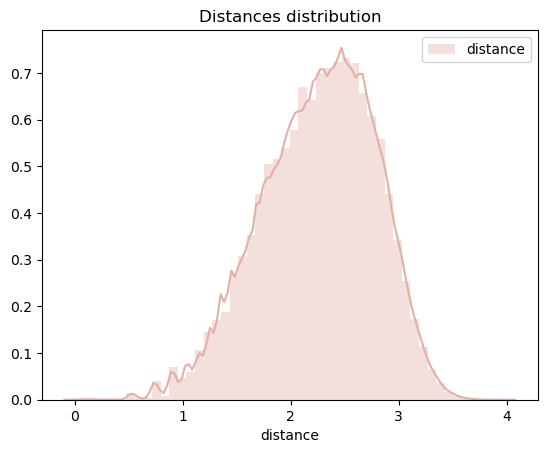

In [139]:
distances.distances_plot(distances_D1) # select reasonable threshold

In [140]:
subset_distances_1_df = distances_counterfactual.get_sorted_distances_below_threshold(distances_D1, 1)
subset_distances_1_df

,sentence_1,sentence_2,distance
0,38,1671,0.000000
1,34,64,0.000000
2,805,810,0.000000
3,687,705,0.000000
4,1477,1679,0.000000
...,...,...,...
21345,255,1717,0.999350
21346,1415,1835,0.999358
21347,10,1117,0.999537
21348,298,1420,0.999728


In [141]:
df_similar_different_label_1 = distances_counterfactual.get_top_n_similar_pairs_different_label(df, subset_distances_1_df, 20)
print(len(df_similar_different_label_1))

20


In [142]:
group_differences_df_1 = differences.get_top_n_sentences_diference_by_group(df, df_similar_different_label_1, cols_diff, n = len(df_similar_different_label_1), file_name=r"..\..\data\feature_category.csv")
group_differences_df_1

,feature group,frequency
0,Judge,19
1,Economical aspects,16
2,Subjectivity (parents),16
3,Location,13
4,Legal principles (general),10
5,Personal circumstances (children),4


## Candidates distances 2 (relevant)

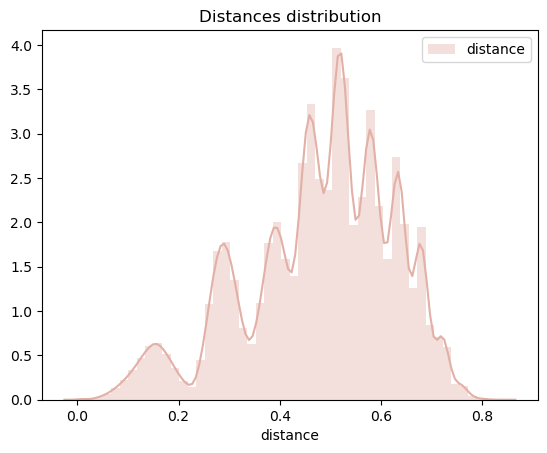

In [143]:
distances.distances_plot(distances_D2) # select reasonable threshold

In [144]:
subset_distances_2_df = distances_counterfactual.get_sorted_distances_below_threshold(distances_D2, 0.1)
subset_distances_2_df

,sentence_1,sentence_2,distance
0,38,1671,0.000000
1,332,799,0.000000
2,121,1191,0.000000
3,687,705,0.000000
4,805,810,0.000000
...,...,...,...
13550,853,973,0.099987
13551,1006,1668,0.099989
13552,92,943,0.099990
13553,158,1243,0.099996


In [145]:
df_similar_different_label_2 = distances_counterfactual.get_top_n_similar_pairs_different_label(df, subset_distances_2_df, 20)
print(len(df_similar_different_label_2))

20


In [146]:
differences_df_relevant = differences.get_top_n_sentences_diference(df, df_similar_different_label_2, cols_diff, n = len(df_similar_different_label_2), summary = True)
differences_df_relevant

,feature,frequency
0,JUDGE_ID,19
1,FT_RA,16
2,FT_RD,16
3,AUT_COMM,14
4,LP_BI,9
5,FT_CC,4


In [147]:
group_differences_df_2 = differences.get_top_n_sentences_diference_by_group(df, df_similar_different_label_2, cols_diff, n = len(df_similar_different_label_2), file_name=r"..\..\data\feature_category.csv")
group_differences_df_2

,feature group,frequency
0,Judge,19
1,Subjectivity (parents),16
2,Economical aspects,16
3,Location,14
4,Legal principles (general),9
5,Personal circumstances (children),4


## Candidates distance 3 (top 10 weights)

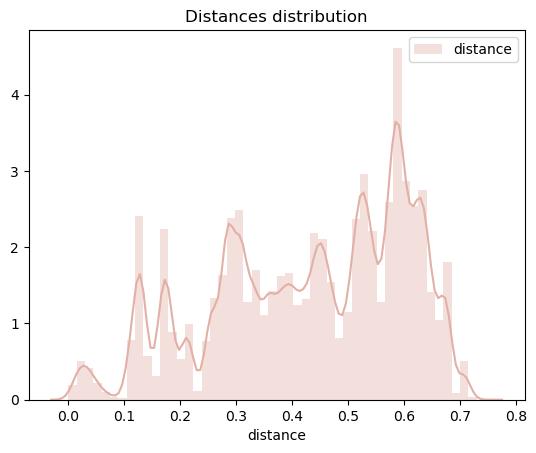

In [148]:
distances.distances_plot(distances_D3) # select reasonable threshold

In [149]:
subset_distances_3_df = distances_counterfactual.get_sorted_distances_below_threshold(distances_D3, 0.04)
subset_distances_3_df

,sentence_1,sentence_2,distance
0,775,1741,0.000000
1,1243,1646,0.000000
2,1650,1659,0.000000
3,131,393,0.000000
4,1293,1611,0.000000
...,...,...,...
26583,182,828,0.039994
26584,87,890,0.039994
26585,29,738,0.039994
26586,1098,1859,0.039994


In [150]:
df_similar_different_label_3 = distances_counterfactual.get_top_n_similar_pairs_different_label(df, subset_distances_3_df, 20)
print(len(df_similar_different_label_3))

20


In [151]:
differences_df_top = differences.get_top_n_sentences_diference(df, df_similar_different_label_3, cols_diff, n = len(df_similar_different_label_3), summary = True)
differences_df_top

,feature,frequency
0,JUDGE_ID,20
1,AUT_COMM,17
2,JUDGE_ML,11
3,FT_RD,8
4,FT_RP_b,8
6,FT_CW_b,8
8,FT_CR,7
10,FT_PD,6
12,RQ_FH_AT,6
13,FT_AG,5


In [152]:
group_differences_df_3 = differences.get_top_n_sentences_diference_by_group(df, df_similar_different_label_3, cols_diff, n = len(df_similar_different_label_3), file_name=r"..\..\data\feature_category.csv")
group_differences_df_3

,feature group,frequency
0,Judge,20
1,Location,17
2,Subjectivity (children),15
3,Gender,11
4,Economical aspects,11
5,Subjectivity (parents),11
6,Requests,10
7,"Personal circumstances (parents, children)",8
8,Procesal (economia del procedimiento),4


## Plot radar chart

In [153]:
# merge all dataframes
df_radar_chart = group_differences_df_1.merge(group_differences_df_2, how='outer', on='feature group')
df_radar_chart = df_radar_chart.merge(group_differences_df_3, how='outer', on='feature group')

# fill Nan values with a 0
df_radar_chart = df_radar_chart.fillna(0)

# rename cols
df_radar_chart = df_radar_chart.rename(columns = {'frequency_x':'frequency_dist_1', 'frequency_y':'frequency_dist_2', 'frequency': 'frequency_dist_3'})

# change to relative frequency
df_radar_chart["frequency_dist_1"] = df_radar_chart["frequency_dist_1"]/len(df_similar_different_label_1)
df_radar_chart["frequency_dist_2"] = df_radar_chart["frequency_dist_2"]/len(df_similar_different_label_2)
df_radar_chart["frequency_dist_3"] = df_radar_chart["frequency_dist_3"]/len(df_similar_different_label_3)

df_radar_chart

,feature group,frequency_dist_1,frequency_dist_2,frequency_dist_3
0,Judge,0.95,0.95,1.00
1,Economical aspects,0.80,0.80,0.55
2,Subjectivity (parents),0.80,0.80,0.55
3,Location,0.65,0.70,0.85
4,Legal principles (general),0.50,0.45,0.00
5,Personal circumstances (children),0.20,0.20,0.00
6,Subjectivity (children),0.00,0.00,0.75
7,Gender,0.00,0.00,0.55
8,Requests,0.00,0.00,0.50
9,"Personal circumstances (parents, children)",0.00,0.00,0.40


In [154]:
import plotly.graph_objects as go

categories = df_radar_chart["feature group"]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_radar_chart["frequency_dist_1"],
      theta=categories,
      #fill='toself',
      #fillcolor="#a6611a",
      line=dict(color="#a6611a"),
      name='D1',
      opacity=1
))
fig.add_trace(go.Scatterpolar(
      r=df_radar_chart["frequency_dist_2"],
      theta=categories,
      #fill='toself',
      #fillcolor="#80cdc1",
      line=dict(color="#80cdc1"),
      name='D2',
      opacity=1
))
fig.add_trace(go.Scatterpolar(
      r=df_radar_chart["frequency_dist_3"],
      theta=categories,
      #fill='toself',
      #fillcolor="#018571",
      line=dict(color="#018571"),
      name='D3',
      opacity=1
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  font=dict(
      size=18,
  ),
  showlegend=True,
  legend=dict(
    yanchor="top",
    y=0.65,
    xanchor="left",
    x=0.85
  ),
  autosize=False,
  width=1000,
  height=500
)

fig.show()

In [155]:
fig.write_image('radar_chart.pdf', format='pdf')
